# Customer Segmentation

In [4]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix

# Load The Dataset

In [5]:
data = pd.read_csv('Mall_Customers.csv')
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [6]:
print(X)

[['Male' 19 15]
 ['Male' 21 15]
 ['Female' 20 16]
 ['Female' 23 16]
 ['Female' 31 17]
 ['Female' 22 17]
 ['Female' 35 18]
 ['Female' 23 18]
 ['Male' 64 19]
 ['Female' 30 19]
 ['Male' 67 19]
 ['Female' 35 19]
 ['Female' 58 20]
 ['Female' 24 20]
 ['Male' 37 20]
 ['Male' 22 20]
 ['Female' 35 21]
 ['Male' 20 21]
 ['Male' 52 23]
 ['Female' 35 23]
 ['Male' 35 24]
 ['Male' 25 24]
 ['Female' 46 25]
 ['Male' 31 25]
 ['Female' 54 28]
 ['Male' 29 28]
 ['Female' 45 28]
 ['Male' 35 28]
 ['Female' 40 29]
 ['Female' 23 29]
 ['Male' 60 30]
 ['Female' 21 30]
 ['Male' 53 33]
 ['Male' 18 33]
 ['Female' 49 33]
 ['Female' 21 33]
 ['Female' 42 34]
 ['Female' 30 34]
 ['Female' 36 37]
 ['Female' 20 37]
 ['Female' 65 38]
 ['Male' 24 38]
 ['Male' 48 39]
 ['Female' 31 39]
 ['Female' 49 39]
 ['Female' 24 39]
 ['Female' 50 40]
 ['Female' 27 40]
 ['Female' 29 40]
 ['Female' 31 40]
 ['Female' 49 42]
 ['Male' 33 42]
 ['Female' 31 43]
 ['Male' 59 43]
 ['Female' 50 43]
 ['Male' 47 43]
 ['Female' 51 44]
 ['Male' 69 44]


In [7]:
print(y)

[39 81  6 77 40 76  6 94  3 72 14 99 15 77 13 79 35 66 29 98 35 73  5 73
 14 82 32 61 31 87  4 73  4 92 14 81 17 73 26 75 35 92 36 61 28 65 55 47
 42 42 52 60 54 60 45 41 50 46 51 46 56 55 52 59 51 59 50 48 59 47 55 42
 49 56 47 54 53 48 52 42 51 55 41 44 57 46 58 55 60 46 55 41 49 40 42 52
 47 50 42 49 41 48 59 55 56 42 50 46 43 48 52 54 42 46 48 50 43 59 43 57
 56 40 58 91 29 77 35 95 11 75  9 75 34 71  5 88  7 73 10 72  5 93 40 87
 12 97 36 74 22 90 17 88 20 76 16 89  1 78  1 73 35 83  5 93 26 75 20 95
 27 63 13 75 10 92 13 86 15 69 14 90 32 86 15 88 39 97 24 68 17 85 23 69
  8 91 16 79 28 74 18 83]


# Data Analysis

In [8]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

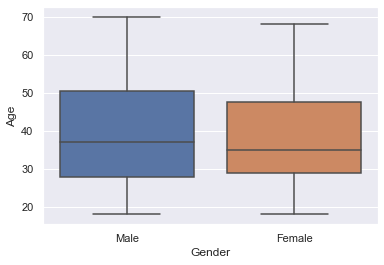

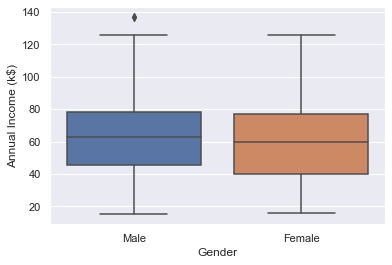

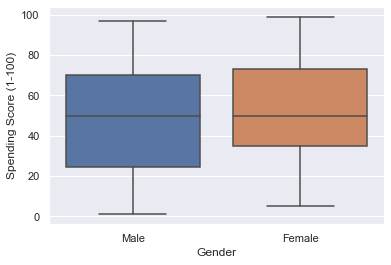

In [40]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=data,x='Gender',y=data[i])

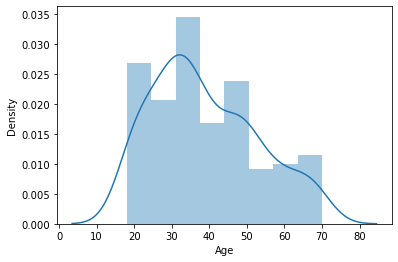

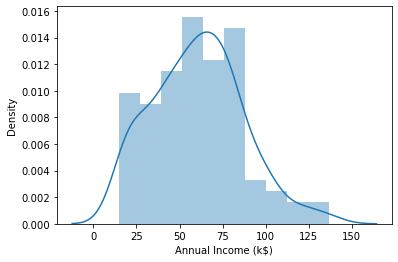

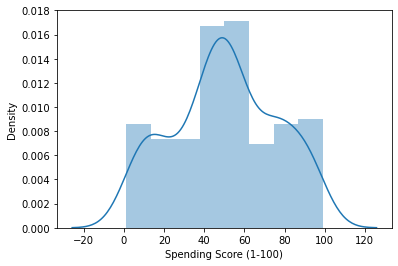

In [9]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(data[i])

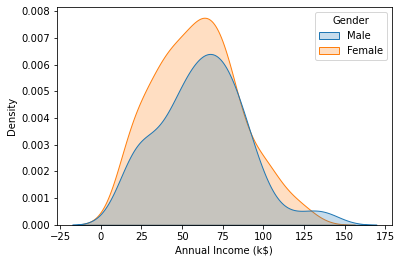

In [10]:
sns.kdeplot(data['Annual Income (k$)'],shade=True,hue=data['Gender']);

In [11]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


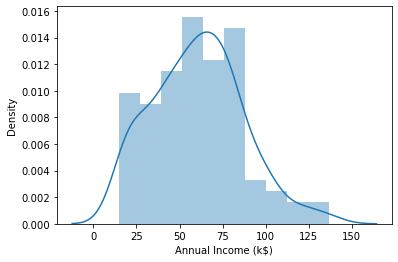

In [12]:
sns.distplot(data['Annual Income (k$)']);

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

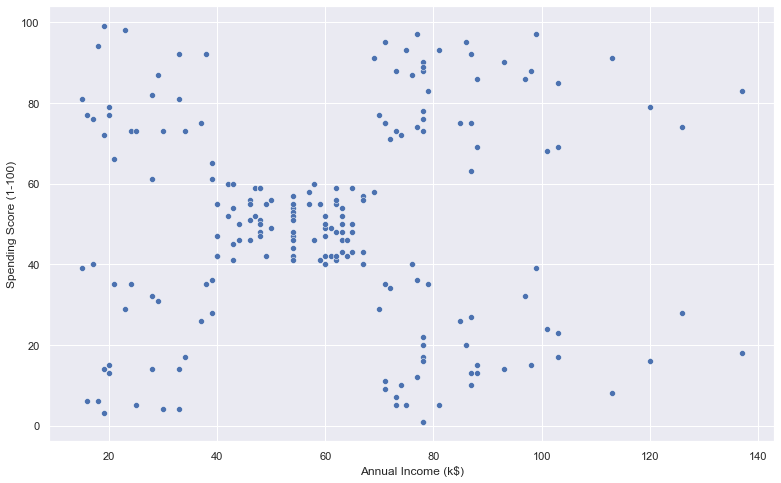

In [24]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'])

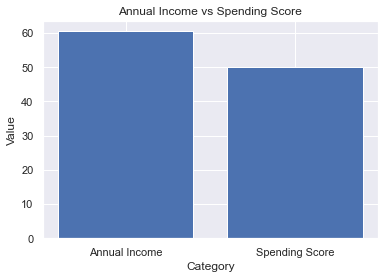

In [25]:
import matplotlib.pyplot as plt

labels = ['Annual Income', 'Spending Score']
values = [60.56, 50.2]


plt.bar(labels, values)
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Annual Income vs Spending Score')

plt.show()


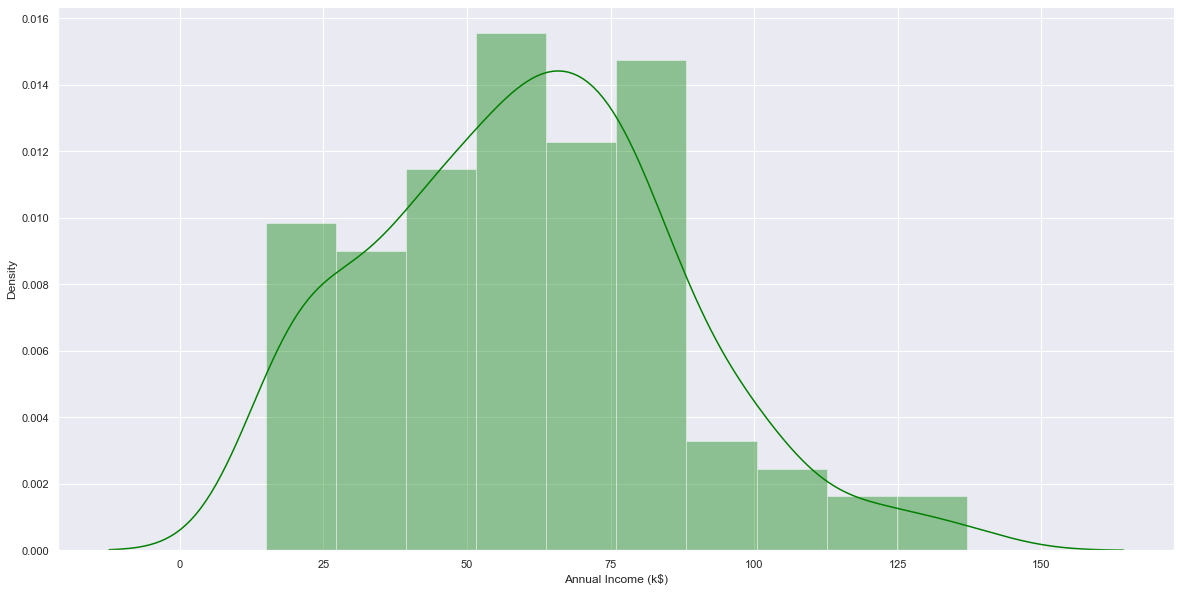

In [27]:
plt.figure(figsize=(20,10))
sns.distplot(data['Annual Income (k$)'], color='green');  

In [13]:
data.shape

(200, 5)

In [14]:
data.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [15]:
data.head(n=10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [16]:
data.tail(n=10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [17]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Choosing the annual income column and spending score column

In [18]:
X = data.iloc[:,[3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# number of clusters
# wcss-->within clusters sum of squares

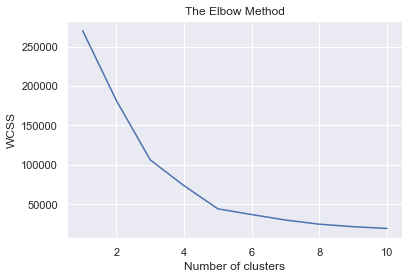

In [31]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
 kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
 kmeans.fit(X)
 wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Optimum number of clusters = 5


# Training the kmeans clustering model

In [37]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


# Visualizing the Model

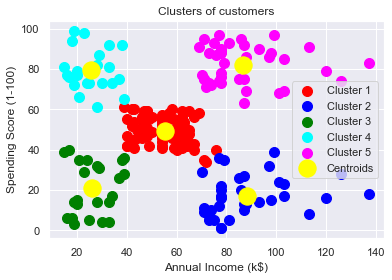

In [38]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 
'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()